In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
TCS_data=pd.read_csv(r"R:\DATA SCIENCE\Dharmarajan\TCS Stock Price Prediction\TCS1.CSV")
TCS_data=pd.DataFrame(TCS_data)
TCS_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [90]:
TCS_data.duplicated().value_counts()

False    4494
Name: count, dtype: int64

In [91]:
TCS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [92]:
TCS_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [93]:
TCS_data.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [94]:
TCS_data=TCS_data.dropna()

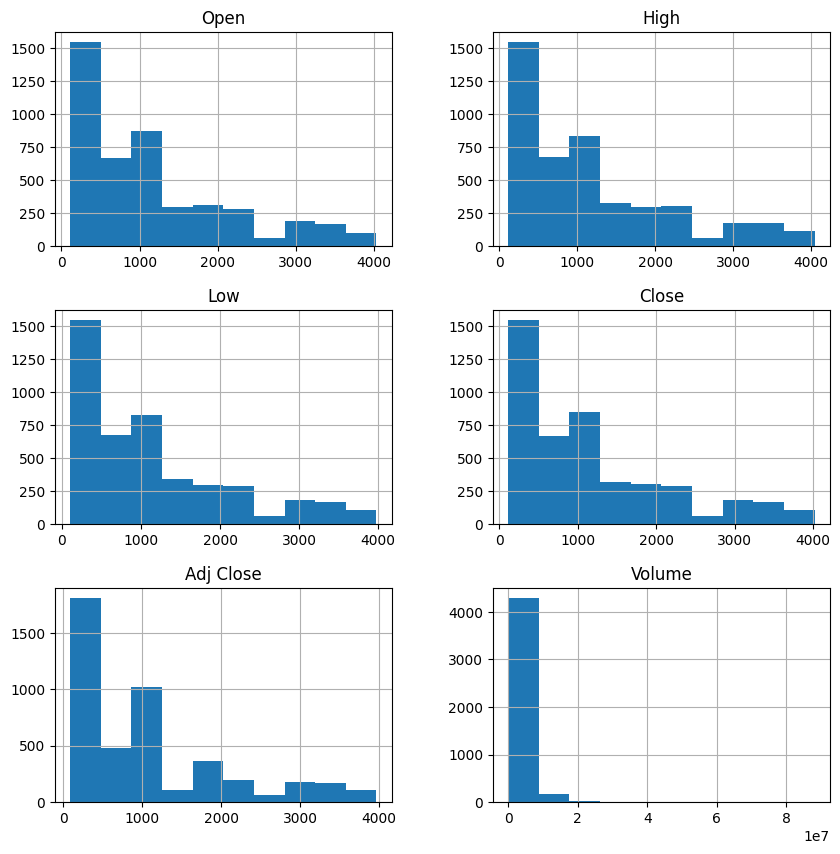

In [95]:
TCS_data.hist(figsize=(10,10),bins=10)
plt.show()

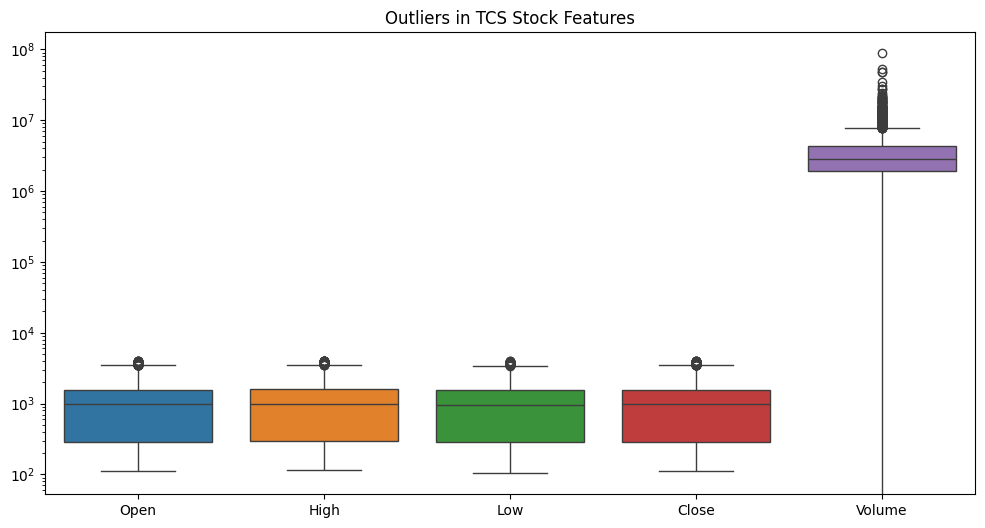

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=TCS_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.yscale('log')  # Log scale for Volume to handle skewness
plt.title('Outliers in TCS Stock Features')
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

X=TCS_data.drop(columns=(['Date','Close']),axis=1)
y=TCS_data['Close']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#shape of the train and test

print("X_train:",X_train.shape,"X_test:",X_test.shape,"y_train:",y_train.shape,"y_test:",y_test.shape)

X_train: (3588, 5) X_test: (898, 5) y_train: (3588,) y_test: (898,)


In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num=['Open','High','Low','Volume']
preprocess=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),num)
    ]
)

In [107]:
preprocess

,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [101]:
# Example
pipe = Pipeline([
    ("scaler", preprocess,),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)  # No manual feature handling needed


In [102]:
pipe

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [103]:
X_test['Close']=y_test

In [105]:
X_test['predictions']=pipe.predict(X_test)

In [108]:
X_test['Actual_Error'] = X_test['Close'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Close']

In [109]:
reg=X_test['Absolute_Percentage_Error'].mean()

In [111]:
print(reg)

0.0053041323484899665
